# Mobile Price Prediction

## Objective

The objective of the project is to build a system that can predict pricing for a mobile phone using data on available phones in the
market. Predict if the mobile can be priced low/med/high/very high. Explore the data to
understand the features and figure out an approach.

# Description of columns:-

- **battery_power:** Battery Capacity in mAh
- **blue:** Has Bluetooth or not
- **clock_speed:** Processor speed
- **dual_sim:** Has dual sim support or not
- **fc:** Front camera megapixels
- **four_g:** Has 4G or not
- **int_memory:** Internal Memory in GB
- **m_deep:** Mobile depth in cm.
- **mobile_wt:** Weight in gm
- **n_cores:** Processor Core Count
- **pc:** Primary Camera megapixels
- **px_height:** Pixel Resolution height
- **px_width:** Pixel Resolution width
- **ram:** Ram in MB
- **sc_h:** Mobile Screen height in cm
- **sc_w:** Mobile Screen width in cm
- **talk_time:** Time a single battery charge will last. In hours.
- **three_g:** Has 3G or not
- **touch_screen:** Has touch screen or not
- **wifi:** Has WiFi or not
- **Price_range:** This is the target- 0 = low cost, 1 = medium cost, 2 = high cost, 3 = very high cost





# Importing Libraries

In [1]:
# Data manipulation and numerical operations
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations

# Data visualization libraries
import matplotlib.pyplot as plt   # For plotting and visualizations
import seaborn as sns   # For visualizations

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score  # For calculating ROC curve and AUC
from sklearn.model_selection import cross_val_score   # For evaluating model performance
from sklearn.model_selection import learning_curve

# Scikit-learn: Preprocessing
from sklearn.preprocessing import MinMaxScaler      # for Normalizing the data
from sklearn.preprocessing import StandardScaler    # for Standardizing the data

# Scikit-learn: Machine learning model
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # for hyperparameter tuning


In [149]:
# loading and reasing the dataset
df=pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', None)  # Show all columns
print('Original shape of the dataset:', df.shape)

# Removing duplicate rows 
df=df.drop_duplicates()
print('Shape after deleting duplicate values in the dataset:', df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
df.head(10)

Original shape of the dataset: (2000, 21)
Shape after deleting duplicate values in the dataset: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [5]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# Descriptive Statistics
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


- The **Means** of features are varying from 0.4950 to 1238.5
- Maximum variation is **ram** followed by **px_height** **battery_power** and **px_width**.

### Feature Skew
- For normal distribution, the skewness should be zero. Thus any balanced data should have a skewness near zero.
- Negative values indicate data is skewed left. The left tail is long relative to the right tail.
- Positive values indicate data is skewed right. The right tail is long relative the left tail.

In [14]:
skew = df.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
skew

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

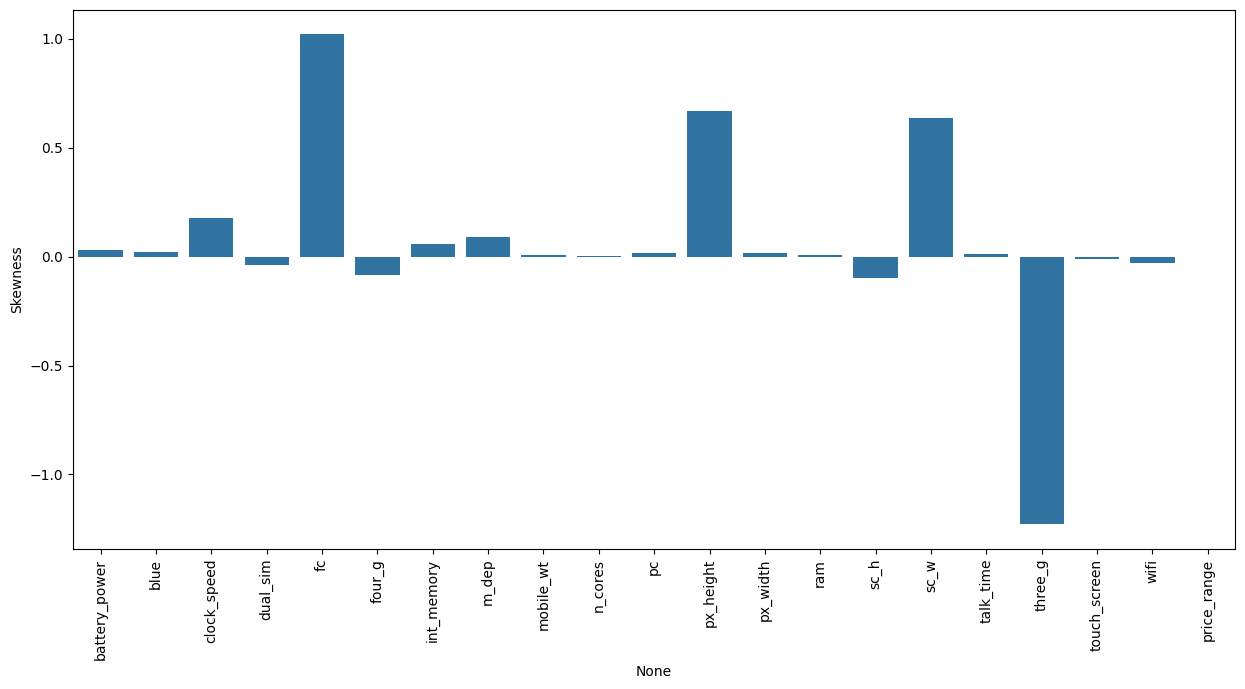

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
var = plt.xticks(rotation=90)

#### Skewness Inferences
- **fc**, **px_height**, **sc_w** and **three_g** has the highest skewness. This means that the mass of the distribution is concentrated to the left and right where **three_g** has the negatively skeweed distribution.

## Univariate and Multivariate analysis

#### Looking at the distribution of Target variable

In [23]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

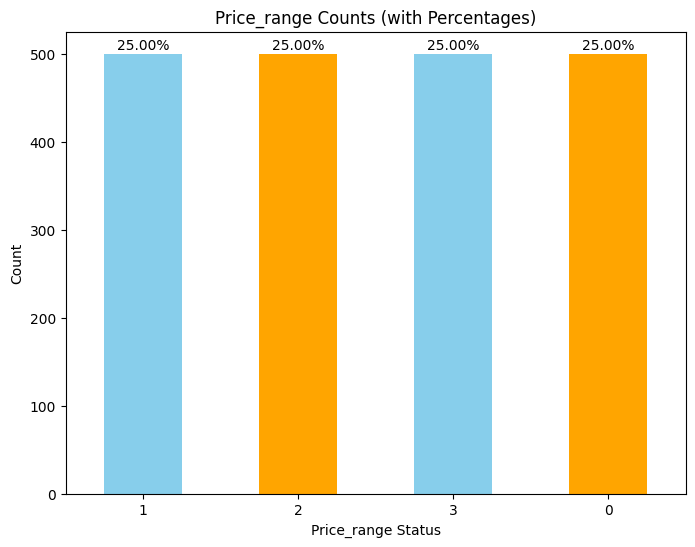

In [25]:
# Calculation of value counts and percentages of "Recurred class"
value_counts = df['price_range'].value_counts()
percentages = (value_counts / len(df['price_range'])) * 100

# Plot the bar chart
ax = value_counts.plot(
    kind='bar',
    color=['skyblue', 'orange'],
    figsize=(8, 6),
    title='Price_range Counts (with Percentages)',
    xlabel='Price_range Status',
    ylabel='Count',
    rot=0
)

# Annotate bars with percentages
for i, count in enumerate(value_counts):
    percentage = f"{percentages.iloc[i]:.2f}%"  # Format percentage
    ax.text(i, count + 5, percentage, ha='center', fontsize=10)  # Adjust the offset as needed

plt.show()

We can see that Price_range has an equal distribution.

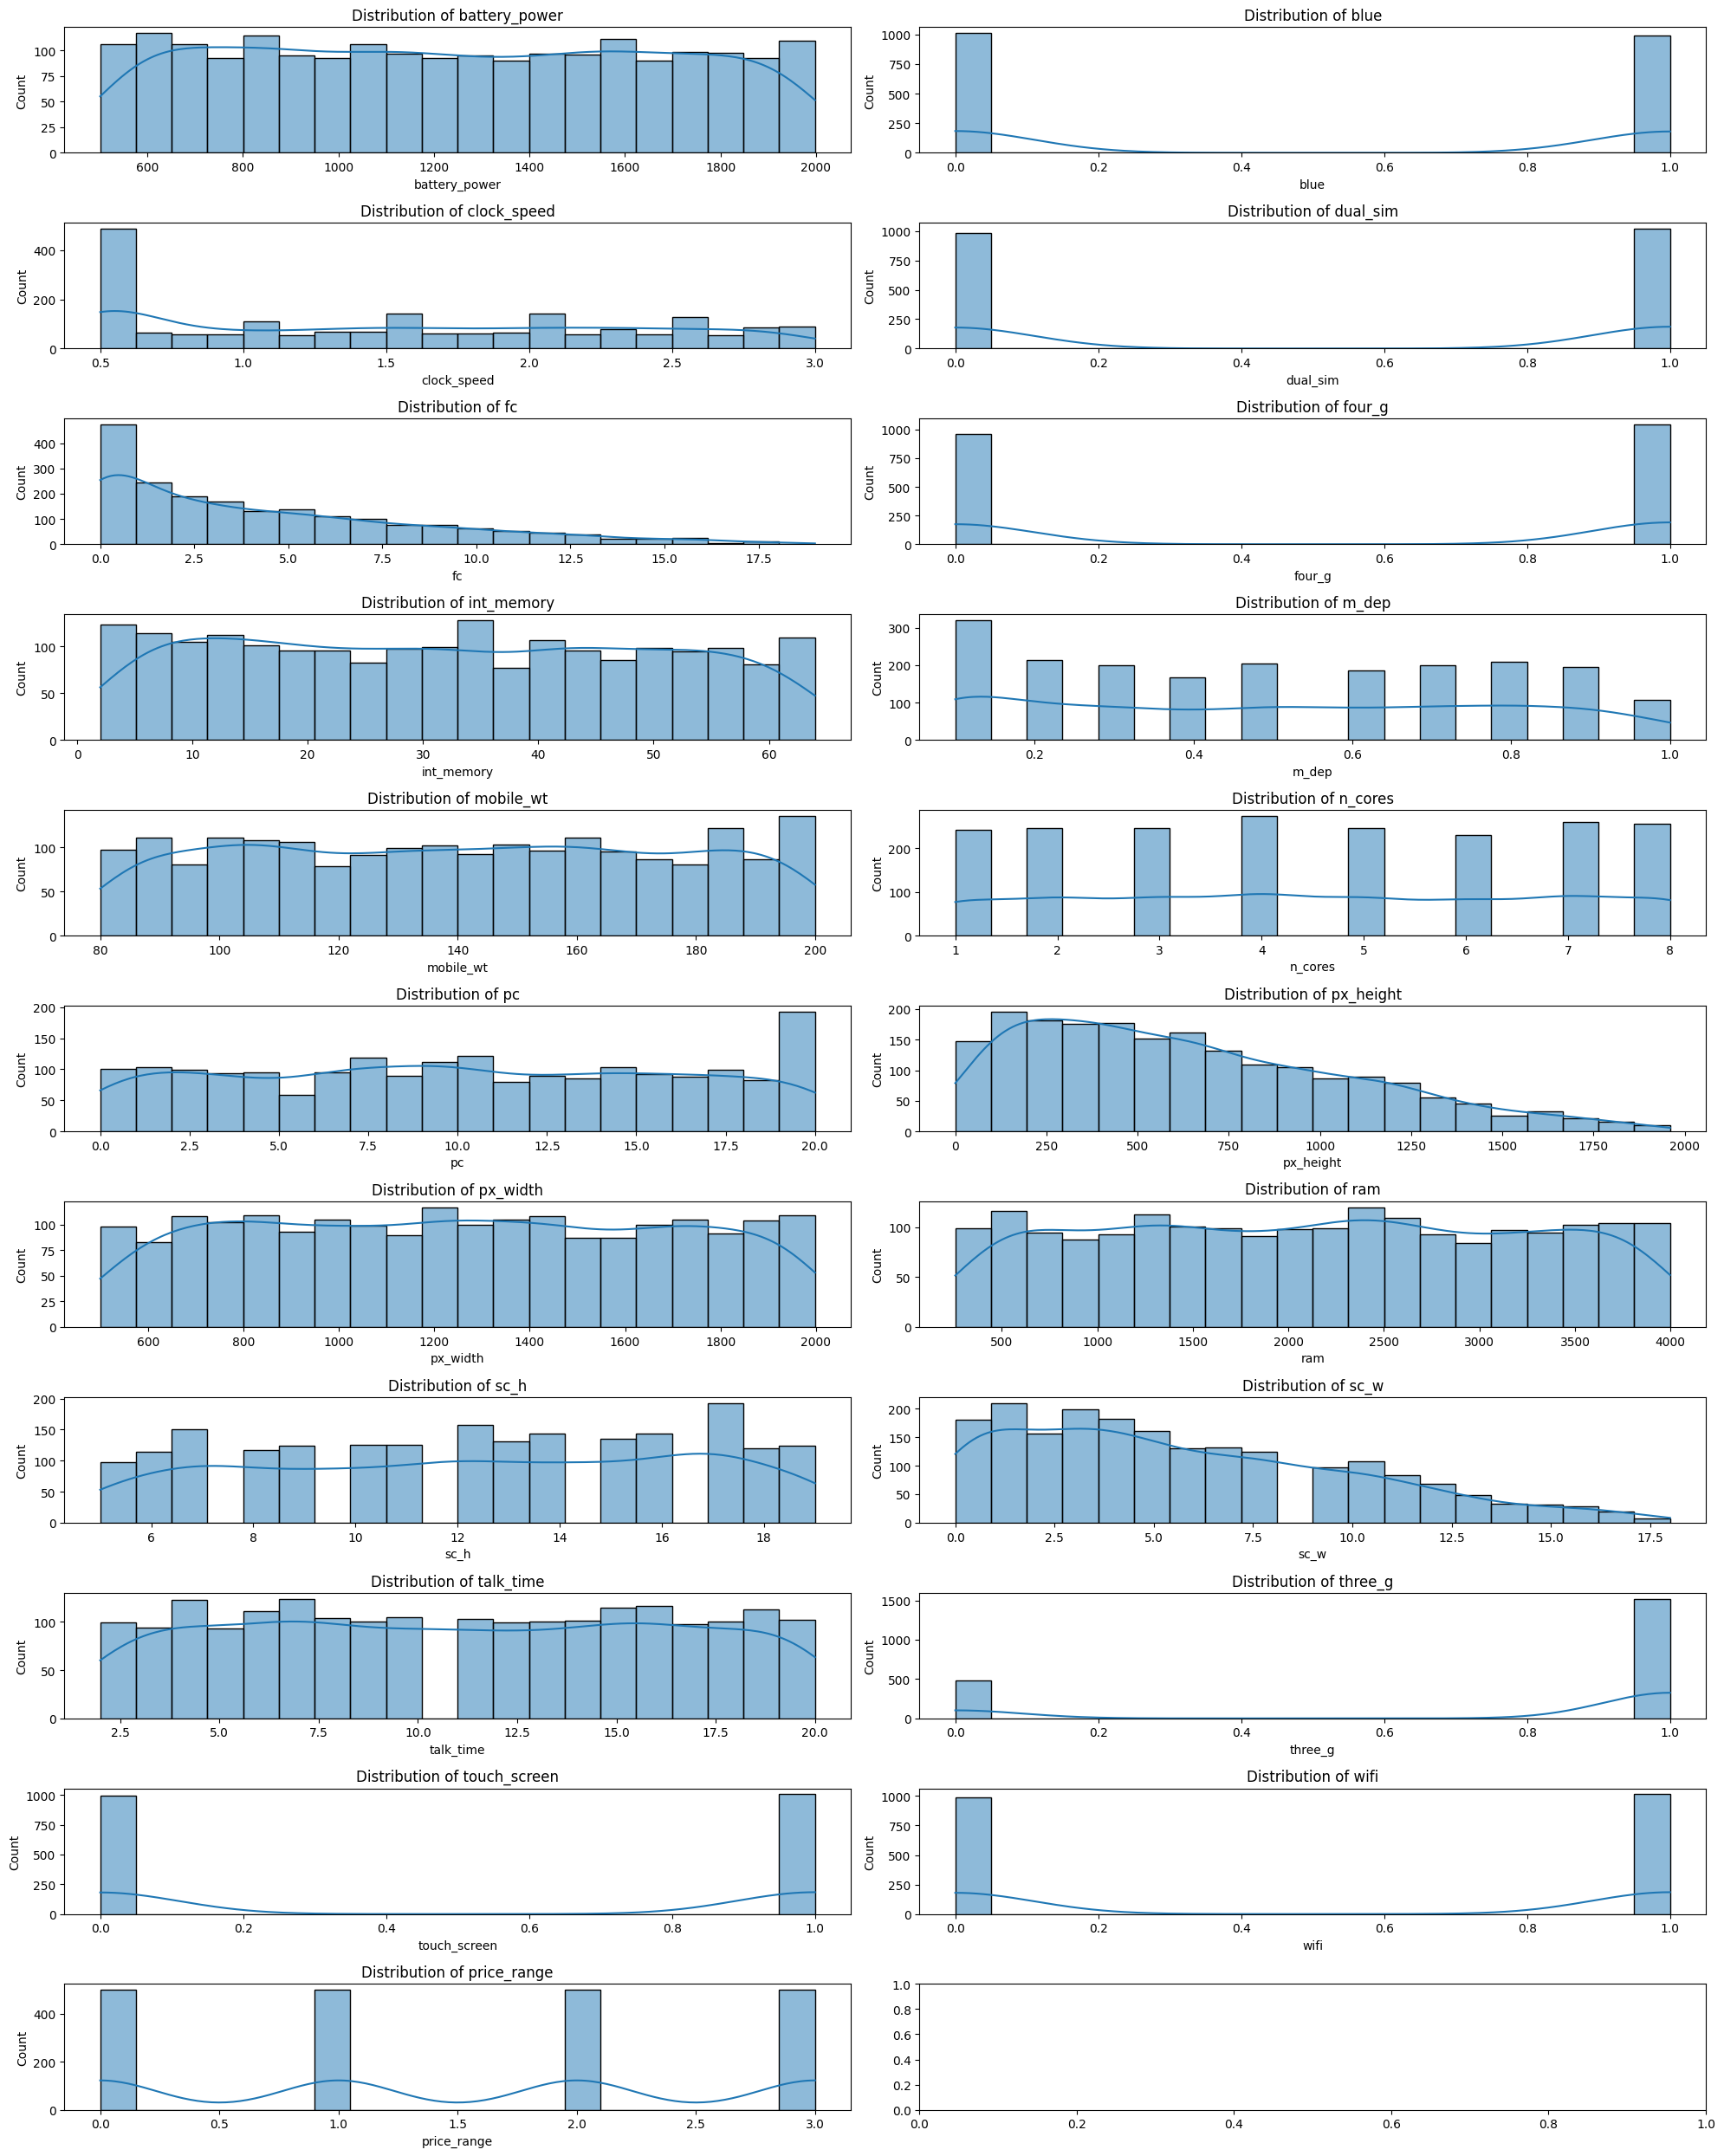

In [28]:
# Creating subplots
fig, axes = plt.subplots(11, 2, figsize=(20, 25))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through columns and plot
for i, column in enumerate(df.columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- In conclusion, it seems that all the features are not normally distributed.

## Feature Comparison

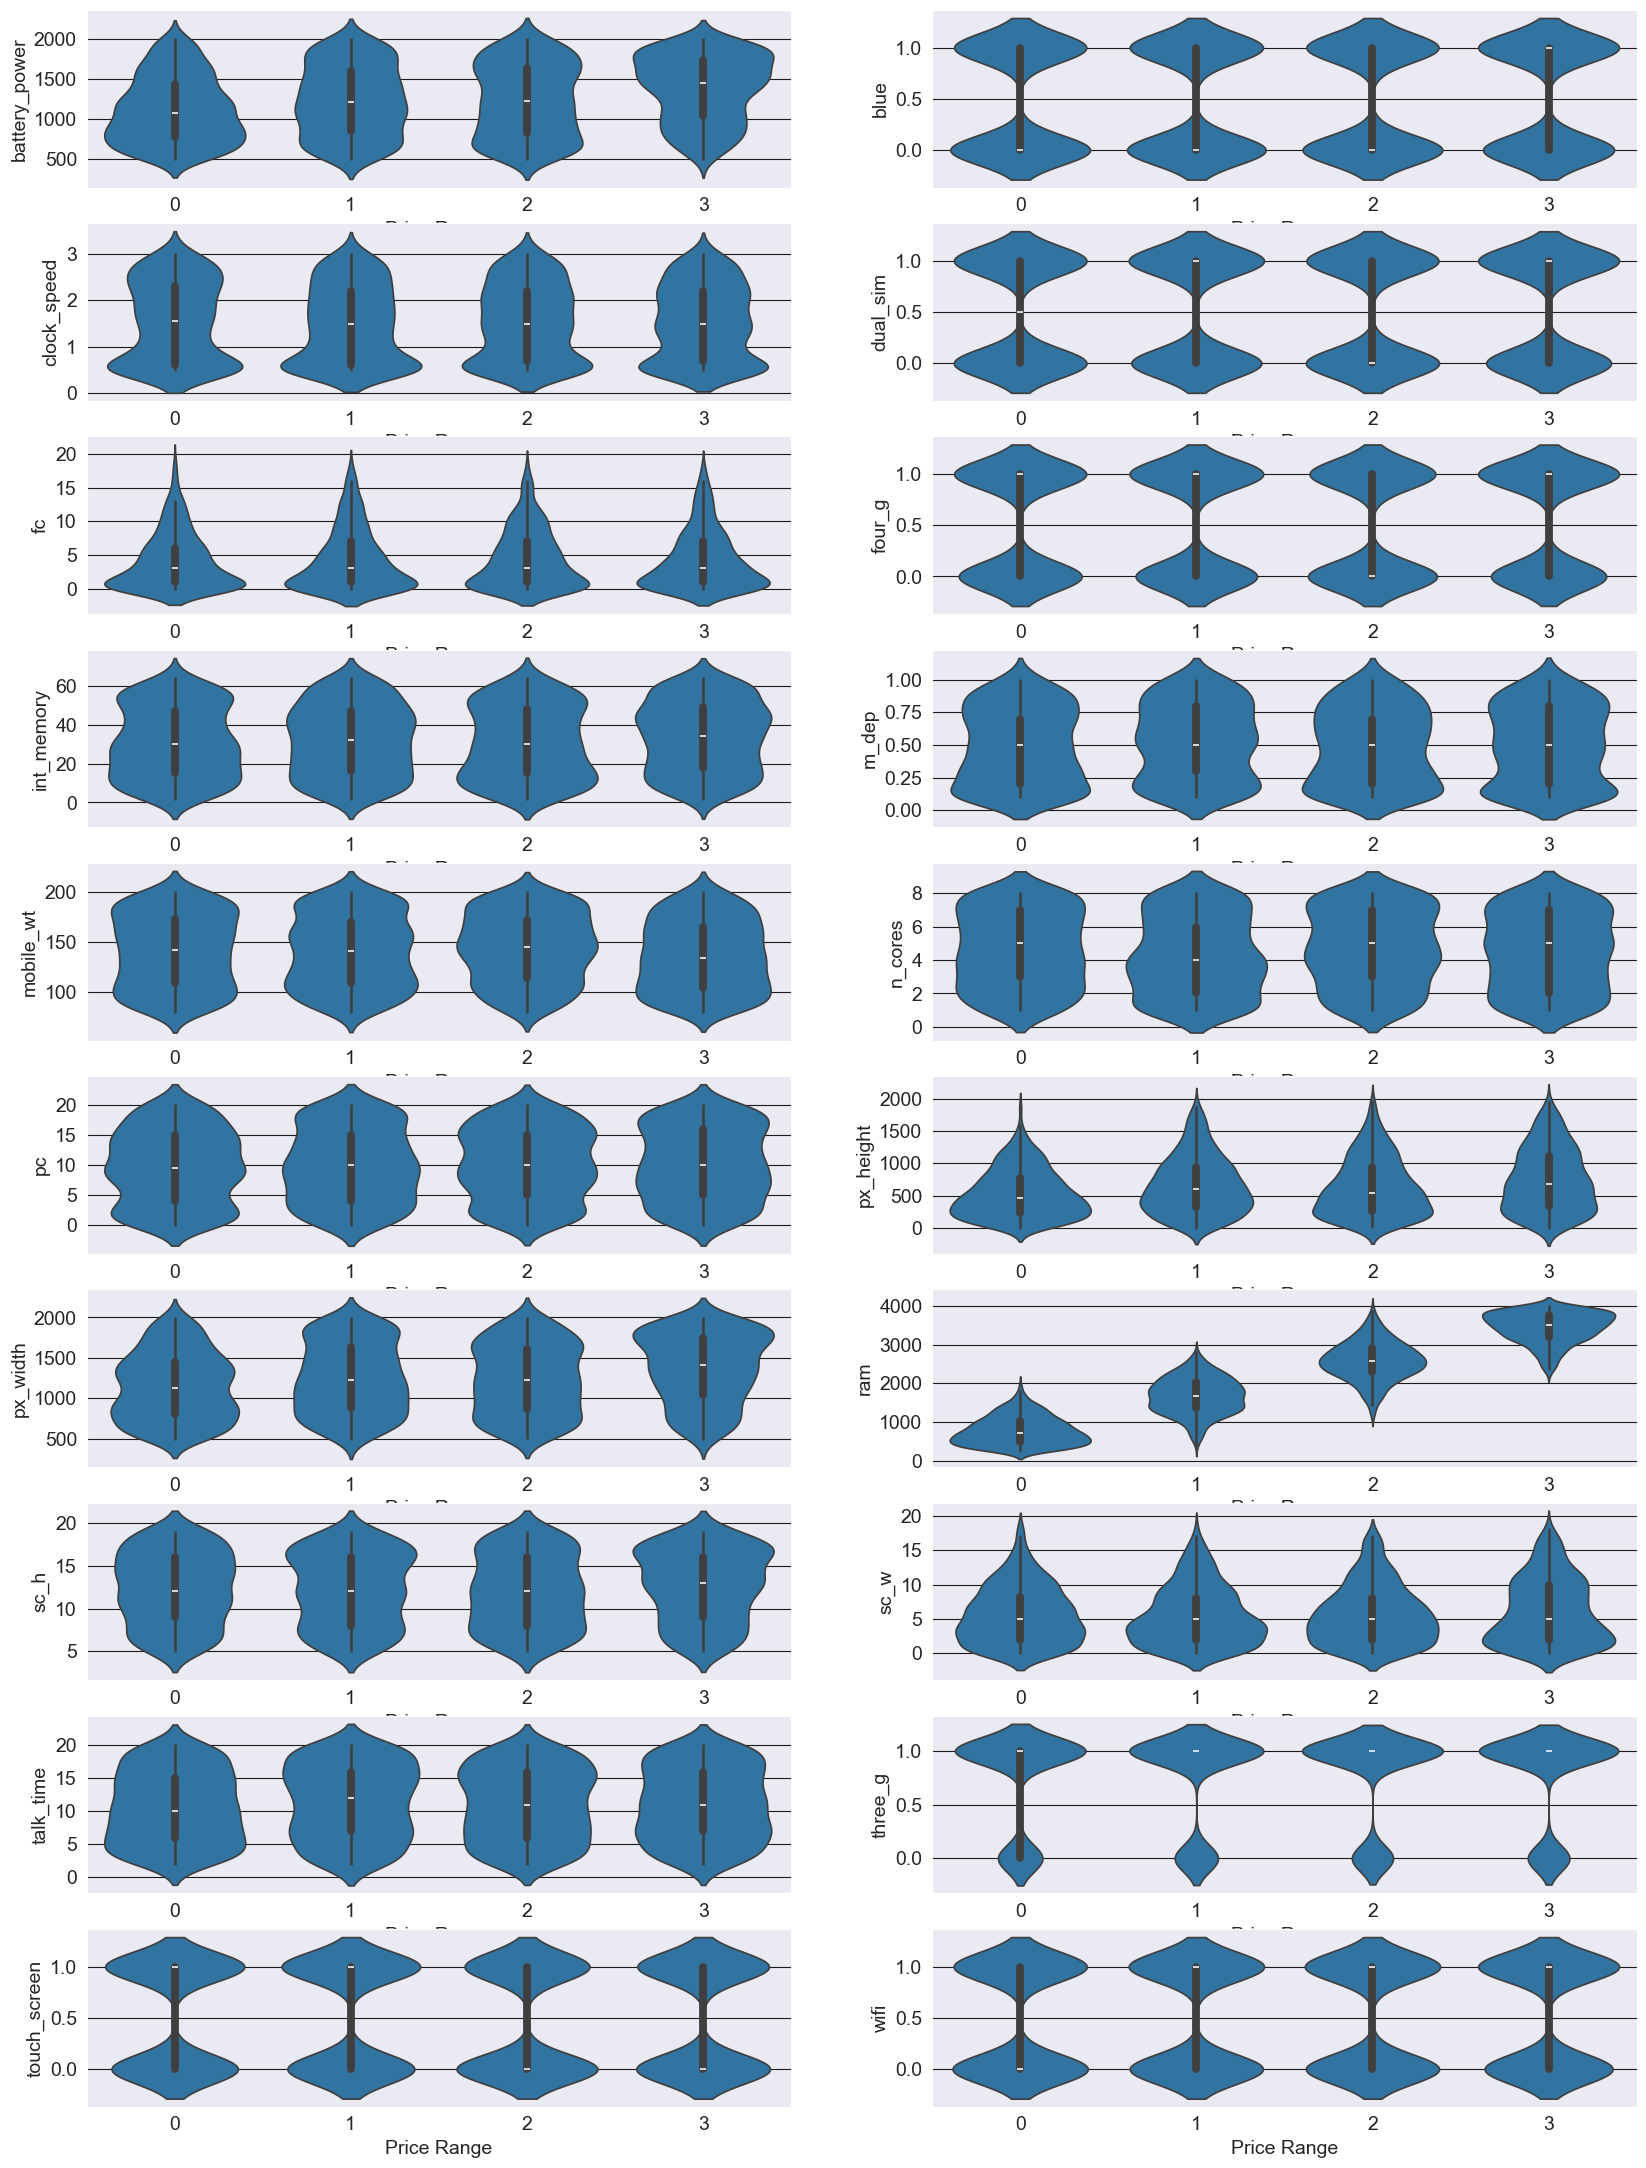

In [32]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = df['price_range']

# features to be compared with target variable
features = df.drop('price_range',axis='columns')

plt.figure(figsize = [20,30])

# loop for violin plot
for i in range(0, len(features.columns)):
    plt.subplot(11,2,1+i)
    sns.violinplot(data=df, x='price_range', y=features.columns[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Price Range', size=14)
    plt.ylabel(features.columns[i], size=14)

plt.show()

#### Insights:
- Higher price ranges have higher **battery power** values on average, as shown by the shift in distribution to the right.
- The distribution is similar across all price ranges, indicating **clock speed** might not strongly affect price.
- Higher price ranges show slightly higher values of front camera **(fc)** resolution, but there’s overlap across ranges.
- There is a clear trend where higher price ranges have significantly higher **RAM**, indicated by a shift in distribution for price ranges 2 and 3.
- Higher price ranges have better screen resolutions, as seen from the higher pixel width and height **(px_width, px_height)**.
- Weight **(mobile_wt)** is distributed similarly across price ranges, indicating no strong relationship between weight and price.
- **blue, dual_sim, four_g, and three_g** are uniformly distributed across price ranges, suggesting that they might not strongly influence price.
- Others, like **touch_screen**, seem uniformly distributed and do not contribute much to price differentiation.

## Feature Correlation

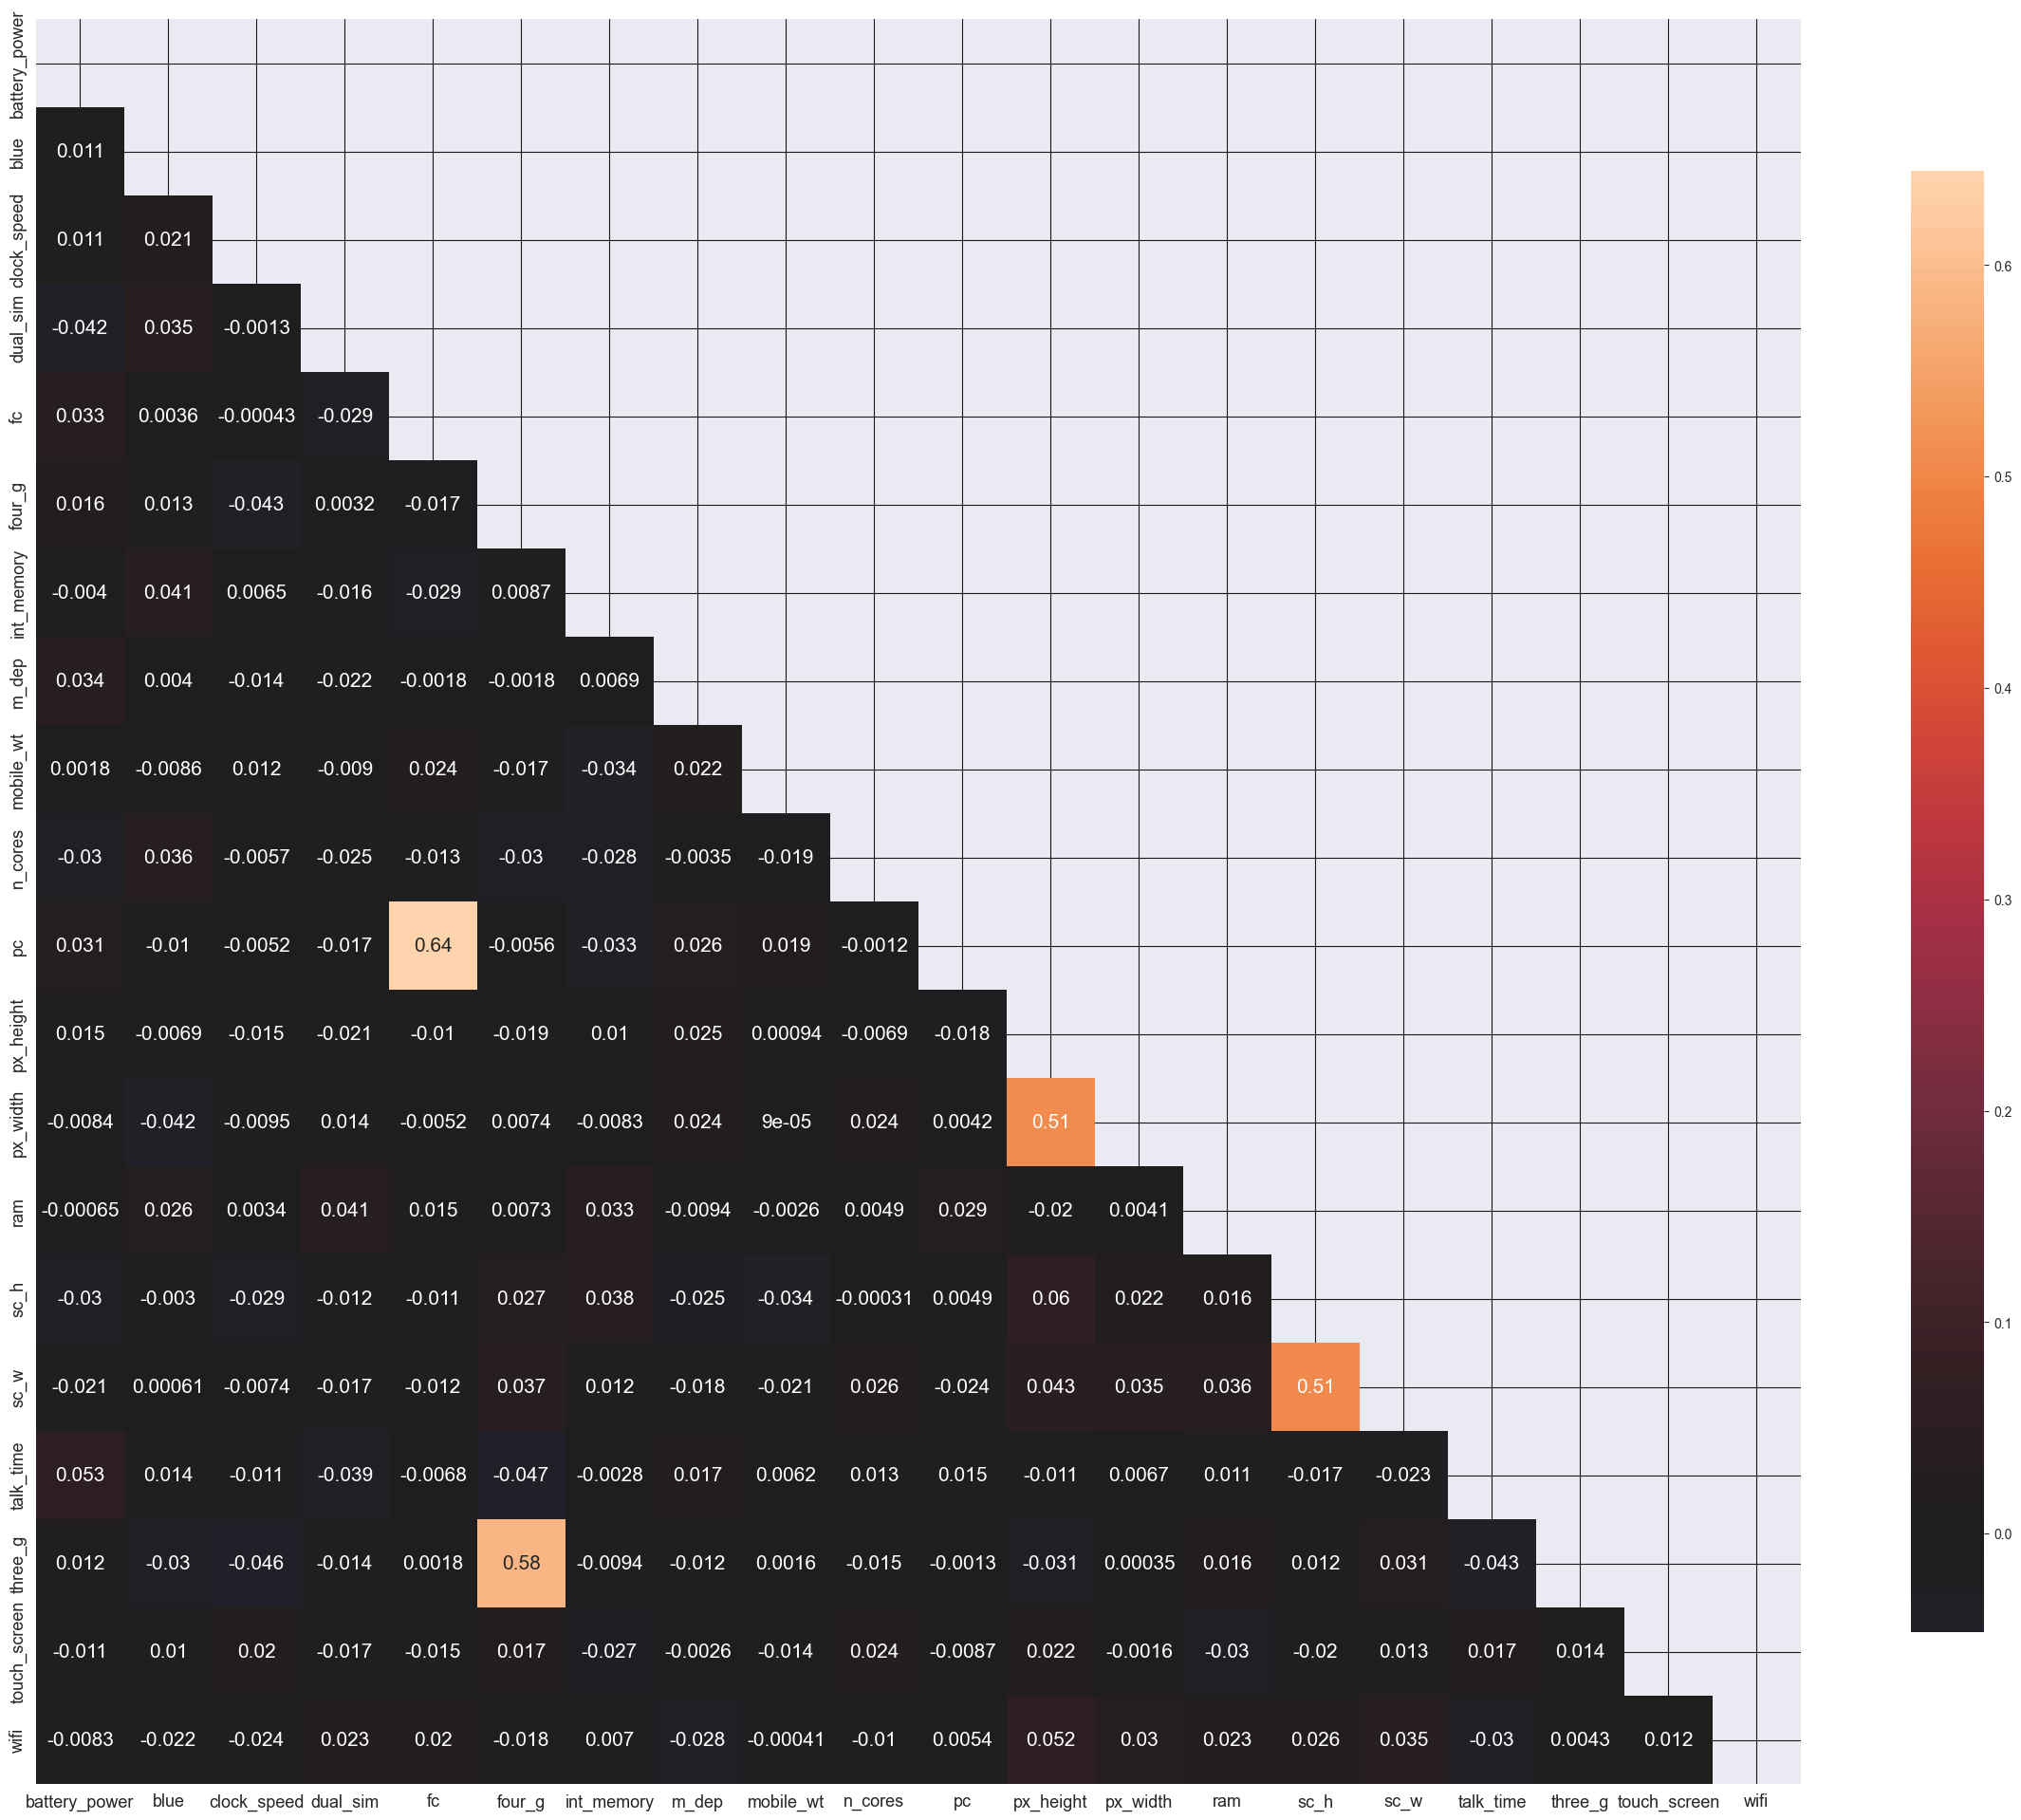

In [36]:
plt.subplots(figsize=(30,25))

# compute correlation matrix
features_corr = features.corr()

# generate mask for upper triangle
mask = np.zeros_like(features_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# generating heatmap masking the upper triangle and shrink the cbar
sns.heatmap(features_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

- The Predictors must have the least correlation between them. The least correlated value tells us that each feature has different valuable information that could be important features for predictions.
- We can see that there is a high positive correlation between **pc and fcc**, **four_g and three_g**, **px_height and px_width** and **sc_h and sc_w**.

## Splitting to Train and Test

In [40]:
# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score  # For calculating ROC curve and AUC

In [42]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


## Scaling the Data for the Models

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
features_scaled= scaler.transform(features)

## Softmax Regression Model

In [48]:
from sklearn.linear_model import LogisticRegression
# Initializing and training the model
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)   # by default multi nominal regression used
lr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluating the model
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Cross-Validation Score:", np.mean(cross_val_score(lr_model, features_scaled, target, scoring='accuracy', cv=10)))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.91      0.95      0.92        91
           2       0.91      0.84      0.87        92
           3       0.95      0.96      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Accuracy Score: 0.94
Cross-Validation Score: 0.9255000000000001


## Support Vector Machine (SVM)

In [132]:
from sklearn.svm import SVC

# Initializing and training the SVM model
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluating the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("Cross-Validation Score:", np.mean(cross_val_score(svm_model, features_scaled, target, scoring='accuracy', cv=10)))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.80      0.85      0.82        91
           2       0.76      0.77      0.76        92
           3       0.93      0.87      0.90       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

Accuracy Score: 0.8625
Cross-Validation Score: 0.8640000000000001


## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the model
rf_model = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Cross-Validation Score:", np.mean(cross_val_score(rf_model, features_scaled, target, scoring='accuracy', cv=10)))
print("OOB Score:", rf_model.oob_score_)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

Accuracy Score: 0.8925
Cross-Validation Score: 0.8784999999999998
OOB Score: 0.859375


## Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Training the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Classifier Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Cross-Validation Score:", np.mean(cross_val_score(dt_model, features_scaled, target, scoring='accuracy', cv=10)))

Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.75      0.84      0.79        91
           2       0.80      0.71      0.75        92
           3       0.87      0.90      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400

Accuracy Score: 0.835
Cross-Validation Score: 0.835


## Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialization and training of the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

#  predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("Cross-Validation Score:", np.mean(cross_val_score(gb_model, features_scaled, target, scoring='accuracy', cv=10)))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.89      0.89        91
           2       0.82      0.87      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400

Accuracy Score: 0.905
Cross-Validation Score: 0.9109999999999999


## XG Boost

In [59]:
import xgboost as xgb

# Initialization and training of XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluations
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("Cross-Validation Score:", np.mean(cross_val_score(xgb_model, features_scaled, target, scoring='accuracy', cv=10)))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.88      0.93      0.90        91
           2       0.84      0.85      0.84        92
           3       0.93      0.88      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400

Accuracy Score: 0.905
Cross-Validation Score: 0.9179999999999999


## Multi Layer Perceptron

In [62]:
from sklearn.neural_network import MLPClassifier

# Initialization and training the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=800, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluation
print("MLPClassifier Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Accuracy Score:", accuracy_score(y_test, y_pred_mlp))


MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       105
           1       0.91      0.96      0.93        91
           2       0.90      0.88      0.89        92
           3       0.95      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Accuracy Score: 0.9375


## Deep Neural Network (DNN)

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Initialization of DNN model
dnn_model = Sequential()
# First hidden layer
dnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dropout(0.3))  # Dropout with 30% rate
# Second hidden layer
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dropout(0.3))
# Output layer
dnn_model.add(Dense(4, activation='softmax'))  # Multi-class classification (4 classes)
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training  model
history = dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Making predictions
y_pred_dnn = dnn_model.predict(X_test_scaled) 

# Evaluating the model
y_pred_dnn = y_pred_dnn.argmax(axis=1)     # to handle predictions from a neural network's output layer in a multiclass classification problem.
print("DNN Classification Report:\n", classification_report(y_test, y_pred_dnn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dnn))


C:\Users\farma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.2530 - loss: 1.4250 - val_accuracy: 0.2969 - val_loss: 1.3636
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3033 - loss: 1.3626 - val_accuracy: 0.4125 - val_loss: 1.3136
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3405 - loss: 1.3113 - val_accuracy: 0.5562 - val_loss: 1.2491
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4233 - loss: 1.2603 - val_accuracy: 0.5750 - val_loss: 1.1654
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4422 - loss: 1.1858 - val_accuracy: 0.6250 - val_loss: 1.0576
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4791 - loss: 1.1245 - val_accuracy: 0.6250 - val_loss: 0.9587
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5263 - loss: 1.0156 - val_accuracy: 0.6719 - val_loss: 0.8833
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5796 - loss: 0.9468 - val_accuracy: 0.7469 - val_loss

In [68]:
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

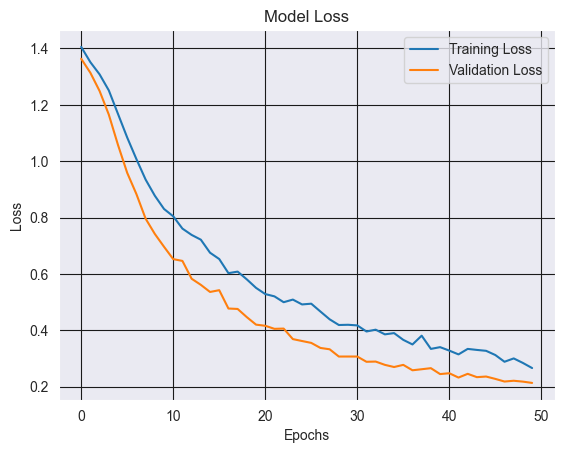

In [82]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')  
plt.show()

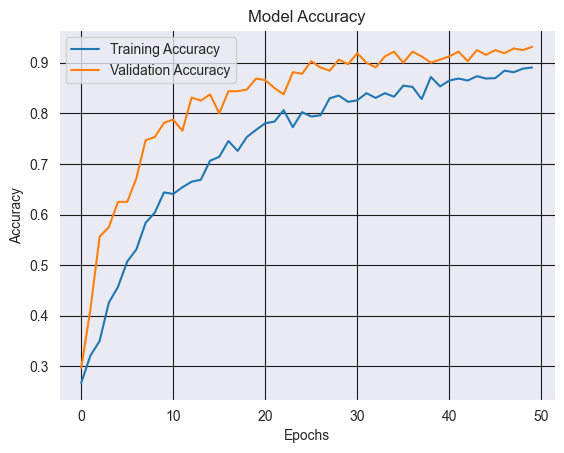

In [80]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()

## Hyperparameter Tuning For Best Parameters

#### 1) DNN Model

In [84]:
from keras_tuner import RandomSearch
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [90]:
# Defining a function to build the model
def model_build(hp):
    model = Sequential()
    # First hidden layer
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(4, activation='softmax'))
    
      # Compiling the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [92]:
# Initializing the tuner
tuner = RandomSearch(model_build,
    objective='val_accuracy',
    max_trials=10,  # Number of models to try
    executions_per_trial=1,  # Number of times to train each model
    directory='hyperparameter_tuning',
    project_name='dnn_tuning'
)

C:\Users\farma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
# Perform the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Trial 10 Complete [00h 00m 21s]
val_accuracy: 0.9468749761581421

Best val_accuracy So Far: 0.9468749761581421
Total elapsed time: 00h 03m 56s


In [98]:
# Retrieving the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Printing the best hyperparameters
print(f"Best hyperparameters:\n"
      f"Units Layer 1: {best_hps.get('units_1')}\n"
      f"Dropout Layer 1: {best_hps.get('dropout_1')}\n"
      f"Units Layer 2: {best_hps.get('units_2')}\n"
      f"Dropout Layer 2: {best_hps.get('dropout_2')}\n"
      f"Learning Rate: {best_hps.get('learning_rate')}")

Best hyperparameters:
Units Layer 1: 64
Dropout Layer 1: 0.30000000000000004
Units Layer 2: 32
Dropout Layer 2: 0.2
Learning Rate: 0.001


In [108]:
# Training the best model
dnn_best_model = tuner.hypermodel.build(best_hps)
history = dnn_best_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the best model
y_pred_best = dnn_best_model.predict(X_test_scaled).argmax(axis=1)

# Print the classification report and accuracy
print("Optimized DNN Classification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best))

Epoch 1/100


C:\Users\farma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2278 - loss: 1.4271 - val_accuracy: 0.2906 - val_loss: 1.3729
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2794 - loss: 1.3716 - val_accuracy: 0.3844 - val_loss: 1.3422
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3242 - loss: 1.3366 - val_accuracy: 0.4875 - val_loss: 1.2882
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4301 - loss: 1.2656 - val_accuracy: 0.5594 - val_loss: 1.1704
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4616 - loss: 1.1588 - val_accuracy: 0.6094 - val_loss: 1.0633
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5133 - loss: 1.0621 - val_accuracy: 0.6844 - val_loss: 0.9130
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5732 - loss: 0.9612 - val_accuracy: 0.6969 - val_loss: 0.8174
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6090 - loss: 0.8800 - val_accuracy: 0.7437 - val_loss: 0.

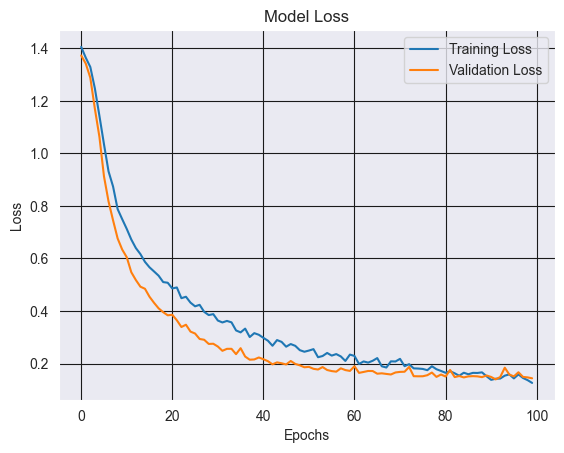

In [110]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')  
plt.show()

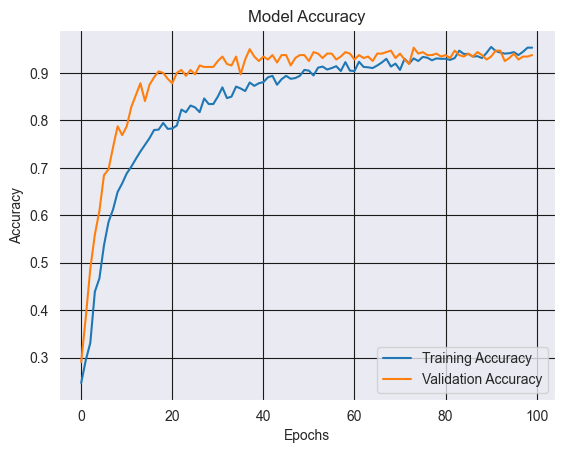

In [112]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()

These two images are suggesting that there is a balance between Variance and Bias.

#### 2) MLP Model

In [120]:
# Defining the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 800, 1000],
}

# Initializing the model
mlp = MLPClassifier(random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# searching for the hyperparameter
grid_search.fit(X_train_scaled, y_train)

# for getting the best model
best_mlp = grid_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluating on the test set
y_pred_best = best_mlp.predict(X_test_scaled)
print("Best MLPClassifier Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Accuracy Score:", accuracy_score(y_test, y_pred_best))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Best MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.94      1.00      0.97        91
           2       0.97      0.96      0.96        92
           3       0.96      0.97      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Best Accuracy Score: 0.9675


#### Plotting Learning Curve 

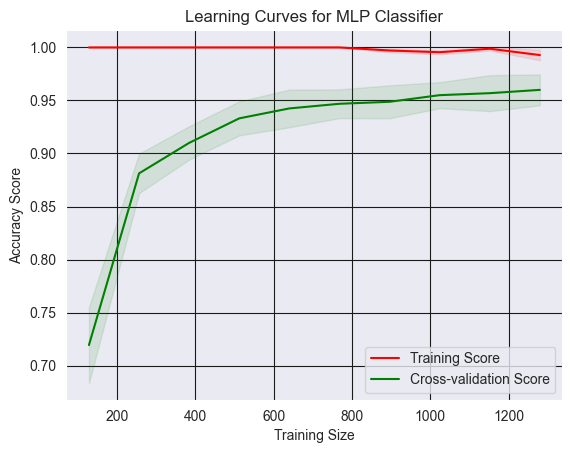

In [123]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# To generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_mlp, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='accuracy')

# To calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Ploting learning curves
plt.figure()
plt.plot(train_sizes, train_mean, label="Training Score", color="r")
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="g")

# Plotting the std deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

# Formatting plot
plt.title("Learning Curves for MLP Classifier")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


It looks like the model has reached a good balance between training performance and generalization, which is exactly what a well-optimized learning curve should indicate. When a model’s learning curves (training and validation) converge closely, with little gap and high accuracy, it typically suggests: -Balanced Bias and Variance, Effective Generalization and Early Stopping or Further Training Not Necessary.

## Comparision of Model Performence

In [145]:
# Defining the models and their corresponding accuracy and cross-validation scores
model_performance = {
    "Model": [
        "Logistic Regression", "SVM", "Random Forest",
        "Decision Tree", "Gradient Boosting", "XGBoost",
        "MLPClassifier", "DNN", "Optimized DNN", "Best MLPClassifier"
    ],
    "Accuracy": [
        0.94, 0.8625, 0.8925, 0.835, 0.905, 0.905,
        0.9375, 0.9375, 0.94, 0.9675
    ],
    "Cross-Validation Score": [
        0.9255, 0.8640, 0.8785, 0.835, 0.911, 0.918,
        None, None, None, None  # Placeholder if some scores aren't available
    ]
}

# Convert the data into a pandas DataFrame for better handling
df2 = pd.DataFrame(model_performance)
df2

,Model,Accuracy,Cross-Validation Score
0,Logistic Regression,0.9400,0.9255
1,SVM,0.8625,0.8640
2,Random Forest,0.8925,0.8785
3,Decision Tree,0.8350,0.8350
4,Gradient Boosting,0.9050,0.9110
5,XGBoost,0.9050,0.9180
6,MLPClassifier,0.9375,NaN
7,DNN,0.9375,NaN
8,Optimized DNN,0.9400,NaN
9,Best MLPClassifier,0.9675,NaN


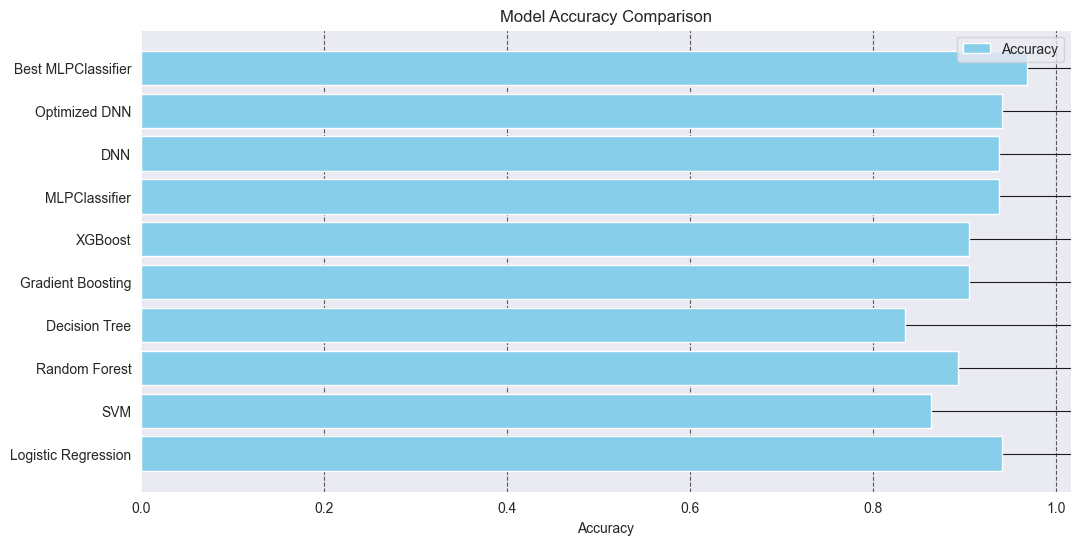

In [147]:
# Plotting accuracy comparison
plt.figure(figsize=(12, 6))
plt.barh(df2['Model'], df['Accuracy'], color='skyblue', label='Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

The Highest accuracy scored by optimized **Best MLPClassifier** with 0.9675	followed by Deep Nueral Network **(Optimized DNN)**.

## Feature importance

#### Feature importance according to Best MLPClassifier

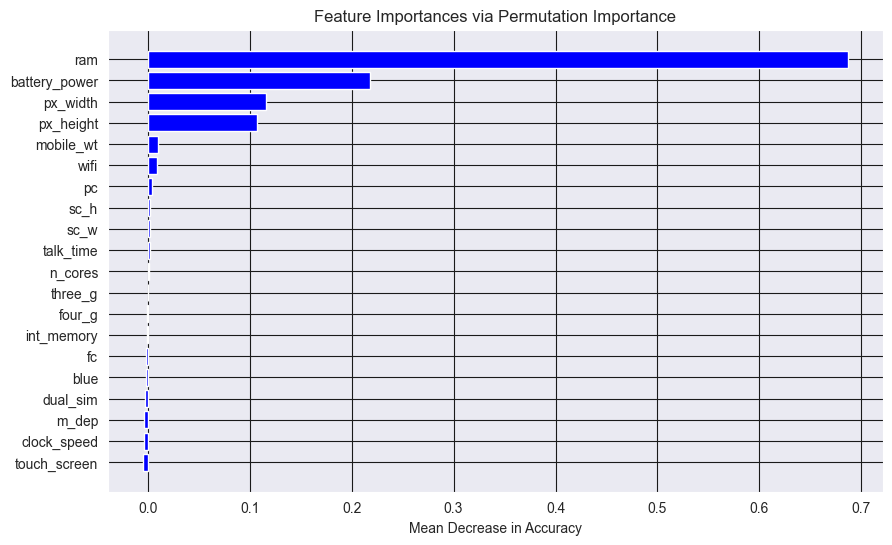

In [153]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_mlp, X_test_scaled, y_test, n_repeats=10, random_state=42)
# Extracting importances and feature names
importances = result.importances_mean
indices = np.argsort(importances)

# to get the feature names
feature_names = list(df.columns)
feature_names.remove('price_range')  # Remove target column if present

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances via Permutation Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Mean Decrease in Accuracy')
plt.show()

This image is showing a horizontal bar chart, representing the permutation importance of various features according to a Best MLPClassifier modelthat I optimized from GridSearchCV. **Title "Feature Importances according to Best MLPClassifier(Permutation Importance)"** indicates the relative impact of each feature on the model's accuracy using the permutation importance method. In **Y-Axis (Features)** - There is sorting in ascending order of importance, with the most important features at the top. IN **X-Axis (Importance Scores)** the higher values indicate greater importance, i.e., features that significantly impact the model's predictive power.

### Insights
Focusing on features lik rame ,Battery Powere , dPX_width and PX_heighy might provide the most predictive value in your dataset.
Low-importance features (e.g.**Touch ScreenpyClock Speed**on) could potentially be dropped for a more streamlined model, depending on our use case and dataset specifics.

# Model Deployment

In [166]:
import joblib

# Saving the trained model
joblib.dump(lr_model, 'LogisticRegression.pkl')
joblib.dump(dnn_best_model,'Deep_neural_network.pkl')
joblib.dump(best_mlp,'Multi_layer_perceptron.pkl')

['Multi_layer_perceptron.pkl']